### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of points (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use a cloud GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "HA1.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1 and HA2):

In [2]:
NAME1 = "Manousos Manouras"
NAME2 = "Birtukan Fozzati"
GROUP = "34"

### Check Python version

In [3]:
from platform import python_version_tuple

assert (
    python_version_tuple()[:2] == ("3", "11")
), "You are not running Python 3.11. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os

nb_dirname = os.path.abspath("")
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in [
    "IHA1",
    "IHA2",
    "HA1",
    "HA2",
], "[ERROR] The notebook appears to have been moved from its original directory"

### Verify correct nb_fname

In [5]:
from IPython.display import HTML, display

try:
    display(
        HTML(
            r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(
                nb_fname=nb_fname
            )
        )
    )
except NameError:
    assert False, "Make sure to fill in the nb_fname variable above!"

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys

sys.path.append("..")
from ha_utils import check_notebook_uptodate_and_not_corrupted

check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/dml-cth/deep-machine-learning/master/home-assignments/HA1/HA1.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# HA1 - Cats and dogs

<img src="https://cdn.pixabay.com/photo/2015/05/20/10/03/cat-and-dog-775116_960_720.jpg" alt="Image of cats and dogs" style="width: 500px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colour images of dogs and cats. Our goal with this assignment will be to create a classifier that can discriminate between cats or dogs.

The goal is to make sure that you all can independently create, train and evaluate a model using a popular deep learning framework. A secondary goal is also to expose you to GPU computing, either your own or via a cloud computing service. The focus is on implementing the models, and much of the surrounding code is provided for you. You are expected to understand the provided code.

## Using your cloud GPU

### Strong recommendation:
In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-3) in your own computer (these tasks can be solved on the CPU), and leave most of the available hours for solving tasks 4-5, and refining your best model further (and, if you have the spare hours, experiment a bit! (Task 6)).

There may well be difficult to access a cloud GPU, we therefore suggest that you start working with the cloud parts as soon as possible. You do not need to complete tasks 2-3 before you start with the GPU requiring tasks (tasks 4-6). A suggested workflow is to complete the task 0-1, start with task 2 and then work on task 2-3 and 4-6 in parallell. 

### Working efficiently:
Training for several epochs just to have your code break at the last validation step is incredibly frustrating and inefficient. Good practice is to first test long training runs with a much simpler dry-run: a single epoch, a few batches et c.

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance. When experimenting, a single epoch is often enough to tell whether your model setup has improved or not.


Hints:
- If you get errors saying you've exhausted the GPU resources, well, then you've exhausted the GPU resources. However, sometimes that's because Pytorch didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough cloud credits to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).
- Solving the computer labs and individual home assignments is a good way to get prepared for this assignment.

**IMPORTANT NOTES:**
- Some cells contain compiled tests. For them to work propery, make sure to keep variable names. For example, if you are asked to create a training dataset, and `train_dataset` is passed to the test, then you should complete the task by updating `train_dataset` variable in your code. But, of course, you can create auxiliary variables.
- Similarly to IHA1 and IHA2, some questions in this notebook will not be graded in detail, but we still expect you to answer them. Those questions are marked with **(0 points)** and, as well as the other questions in this notebook, they may appear in the Inspera test.
- You won't need to train neural networks in Inspera test.

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [7]:
from utils.tests import ha1_tests

# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader, TensorDataset

from torchvision import transforms

import torch
import torch.nn as nn
import torch.optim as optim



---
## 1. Loading the data and preprocessing

In this part we will set up the data used in this assignment. You need to download it, then we'll walk you through how to make a custom Pytorch dataset abstraction. The abstraction enables you to visualise and play around with the image data and to finally create data loaders, which are necessary for the training.

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats/data) and download the data from there. You should download both the test and train folders together in one zip file (there is a `Download all` button at the bottom of the page). Unfortunately, you need to create a Kaggle account for this.

**Only necessary for tasks 4-6**: Downloading the data to your local computer is quite straight-forward. Sooner or later you will have to upload the data to the cloud instance and that is a bit more tricky. There are a few ways to do it:

 - Jupyter Notebook upload function. When starting the notebook server with the command `jupyter notebook` you are directed to a main page. In the top right corner there is an upload button.
 - Using [`scp`](https://linuxize.com/post/how-to-use-scp-command-to-securely-transfer-files/) to copy files via an ssh connection.
 - Using the [Kaggle CLI](https://github.com/Kaggle/kaggle-api). We have added it to the conda environment.

To begin with, download the data to your local computer and create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      cats        dogs       cats        dogs       cats        dogs       cats        dogs


The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`.
This is just a convenient way of having a smaller dataset to play with for faster prototyping.

We provide you a notebook that shows how to achieve this folder structure (`create_project_notebook_structure.ipynb`), starting from the original `dogs-vs-cats.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

**(1 point)**

For the smaller dataset, we advise you to use 70% of the data as training data (and thereby the remaining 30% for validation data). However, for the larger dataset, you should decide how to split between training and validation.

- What percentage of the larger dataset did you decide to use for training/validation?
- Motivate your decision.

**Your answer:** (fill in here)

Fill in the dataset paths (to be used later by your data loaders):

In [8]:
# TODO: Change the directories accordingly
train_path = "./train"
val_path = "./val"
small_train_path = "./small_train"
small_val_path = "./small_val"
# YOUR CODE HERE

### 1.1 Dataset

To create data loaders we first need to create a dataset abstraction class. The purpose of a data loader is to efficiently provide the CPU/GPU with mini-batches of data. We now work with data complex enough to actually warrant the use of data loaders. In particular, we don't want to load all images into memory at once.

Like before, the data loader is an instance of the Pytorch [`DataLoader`](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader) which wraps a class that inherits from [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), that we create ourselves.
Image classification is such a common task that Pytorch provides a ready-to-use dataset class for this task, called [`ImageFolder`](https://pytorch.org/vision/stable/datasets.html?highlight=imagefolder#imagefolder).
Using this class however, is rather opaque so for your understanding we will show you how to construct a custom dataset class. If you know this method, you will be able to create a data loader for any dataset you may encounter.

We construct a class `DogsCatsData` as a subclass of `Dataset`. 
The dataset subclass holds the actual data, or at least provides access to it.
To make it work with the `DataLoader` class we need to implement two methods:

- `__getitem__(self, index)`: return the `index`'th sample, i.e. a single pair of (image, label)
- `__len__(self)`: simply return the total number of samples $N$ in the dataset.

These methods are so called Python "magic" methods, signified by the leading and closing double underscores.
They typically enable special syntax for a class: `__getitem__` enables indexing of a class, and `__len__` enables calling the `len` function:
```python
# Consider an instance `data` of a class `MyDataset` implementing `__getitem__` and `__len__`
data[10] # returns the item with index 10 in `data`
len(data) # returns the length/size of `data`
```
We will return to why these are needed in the `DataLoader` wrapping class

Now, to the actual implementation: The idea is to have the dataset class only store the filenames of the images (and the corresponding label), not the images themselves. We will find and store the filenames in the constructor. The `__getitem__` method will use the index to look up the correct filename and load it into memory.
The `__len__` method is left for you to implement.

Being able to use and understand code you have not written is an important ability. Below you are required to interact with the dataset class with a simple completion of the implementation and by extracting some data from the class. This is partly to ensure that you understand this specific class and partly to show you some tools for exploring new code.

In [9]:
from itertools import chain

from PIL import Image
from torch.utils.data import Dataset


class DogsCatsData(Dataset):
    def __init__(self, root, transform, dog_label=1, cat_label=0):
        """Constructor

        Args:
            root (Path/str): Filepath to the data root, e.g. './small_train'
            transform (Compose): A composition of image transforms, see below.
        """

        root = Path(root)
        if not (root.exists() and root.is_dir()):
            raise ValueError(f"Data root '{root}' is invalid")

        self.root = root
        self.transform = transform
        self._dog_label = dog_label
        self._cat_label = cat_label

        # Collect samples, both cat and dog and store pairs of (filepath, label) in a simple list.
        self._samples = self._collect_samples()

    def __getitem__(self, index):
        """Get sample by index

        Args:
            index (int)

        Returns:
             The index'th sample (Tensor, int)
        """
        # Access the stored path and label for the correct index
        path, label = self._samples[index]
        # Load the image into memory
        img = Image.open(path)
        # Perform transforms, if any.
        if self.transform is not None:
            img = self.transform(img)
        return img, label

    def __len__(self):
        """Total number of samples"""
        # YOUR CODE HERE
        return len(self._samples)

    def _collect_samples(self):
        """Collect all paths and labels

        Helper method for the constructor
        """
        # Iterator over dog filpath
        dog_paths = self._collect_imgs_sub_dir(self.root / "dogs")
        # Iterator of pairs (path, dog label)
        # Again, we use the `map` function to create an iterator. It's use is not as common as the so called
        # 'list comprehension' you've previously seen, but a good alternative to have seen.
        dog_paths_and_labels = map(lambda path: (path, self._dog_label), dog_paths)
        # Same for cats
        cat_paths = self._collect_imgs_sub_dir(self.root / "cats")
        cat_paths_and_labels = map(lambda path: (path, self._cat_label), cat_paths)
        # Sorting is not strictly necessary, but filesystem globbing (wildcard search) is not deterministic,
        # and consistency is nice when debugging.
        return sorted(
            list(chain(dog_paths_and_labels, cat_paths_and_labels)),
            key=lambda x: x[0].stem,
        )

    @staticmethod
    def _collect_imgs_sub_dir(sub_dir: Path):
        """Collect image paths in a directory

        Helper method for the constructor
        """
        if not sub_dir.exists():
            raise ValueError(
                f"Directory '{sub_dir}' does not exist. Are you sure you have the correct path?"
            )
        return sub_dir.glob("*.jpg")

    def get_sample_by_id(self, id_):
        """Get sample by image id

        Convenience method for exploration.
        The indices does not correspond to the image id's in the filenames.
        Here is a (rather inefficient) way of inspecting a specific image.

        Args:
            id_ (str): Image id, e.g. `dog.321`
        """
        id_index = [path.stem for (path, _) in self._samples].index(id_)
        return self[id_index]

**(2 points)**

Show that you understand the implementation by creating an instance called `example_dataset` of it. Create it from the small training set.
Use the instance to:
- print the number of samples in it
- print the label of the second sample, note that this is a number (0 or 1)

In [10]:
# The Dataset constructor has a transform attribute, we will cover it below. Just use this for now:
from torchvision.transforms import Compose

transform = Compose([ToTensor()])
example_dataset = None
number_of_samples = None
label = None
# YOUR CODE HERE
example_dataset = DogsCatsData(small_train_path, transform, dog_label=1, cat_label=0)
number_of_samples = example_dataset.__len__()
_,label = example_dataset.__getitem__(1)

print(f"The number of samples is: {number_of_samples}")
print(f"The label of the second sample is: {label}")

The number of samples is: 3500
The label of the second sample is: 0


In [11]:
# Test case for `number_of_samples`
ha1_tests.test_number_of_samples(example_dataset, number_of_samples, DogsCatsData)

Test passed


In [12]:
# Test case for `label`
ha1_tests.test_label(example_dataset, label, DogsCatsData)

Test passed


It is vital to explore your data, but it can be tricky to deal with images in the tensor format.
To aid you, use the below helper function to visually inspect your images.

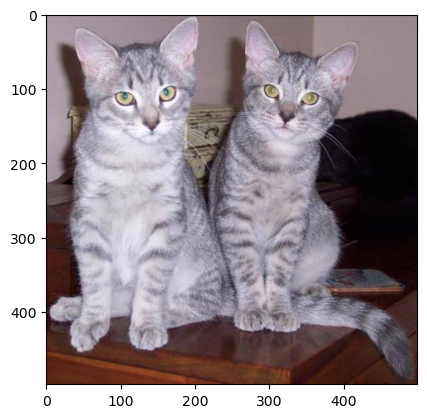

In [13]:
def display_image(axis, image_tensor):
    """Display a tensor as an image

    Args:
        axis (pyplot axis)
        image_tensor (torch.Tensor): tensor with shape (num_channels=3, width, heigth)
    """

    # See hint above
    if not isinstance(image_tensor, torch.Tensor):
        raise TypeError(
            "The `display_image` function expects a `torch.Tensor` "
            + "use the `ToTensor` transformation to convert the images to tensors."
        )

    # The imshow commands expects a `numpy array` with shape (3, width, height)
    # We rearrange the dimensions with `permute` and then convert it to `numpy`
    image_data = image_tensor.permute(1, 2, 0).numpy()
    height, width, _ = image_data.shape
    axis.imshow(image_data)
    axis.set_xlim(0, width)
    # By convention when working with images, the origin is at the top left corner.
    # Therefore, we switch the order of the y limits.
    axis.set_ylim(height, 0)


# Example usage
_, axis = plt.subplots()
some_random_index = 453
# Here we use the __getitem__ method as a "magic" method.
# Implementing it for a class, enables square bracket '[]' indexing
image_tensor, label = example_dataset[some_random_index]
display_image(axis, image_tensor)

### 1.2 Preprocessing 
The `DogsCatsData` class constructor has an argument called `transform`. It allows us to transform or preprocess all the images in a batch, from the raw image data to a more suitable format. There are multiple motivations for preprocessing:

- Some transformations might be needed to actually make the data work with our network (reshaping, permuting dimensions et c.).
- Make the training more efficient by making the input dimensions smaller, e.g. resizing, cropping.
- Artificially expanding the training data through [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/)
- We have some clever idea of how to change the data to create a simpler optimisation problem.

We do not expect you to do data augmentation, but feel free to preprocess the data as you see fit. Use the [documentation](https://pytorch.org/vision/stable/transforms.html#torchvision-transforms) to view available transforms. Extra important is the `Compose` transformation, which is a meta-transformation which composes actual ones, and the `ToTensor` transformation which is the simplest way to go from image to tensor format.


Hints:
- Revisit the `DogsCatsData` example usage to see how to use the `Compose` and `ToTensor` transformations.
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. Resizing the images can be done using the previously mentioned Pytorch Transforms.
- Resizing the images to a smaller size while loading them can be beneficial as it speeds up training. The CNN's do surprisingly well on 64x64 or even 32x32 images. Shorter training cycles give you more time to experiment! Note: The VGG network used later in this assignment is specialised for images that are 224x224.

We encourage you to explore the data and choose transformations that you believe to be useful. For exploration we provide you with a helper function to visually compare transformations side by side:

In [14]:
def compare_transforms(transformations, index):
    """Visually compare transformations side by side.
    Takes a list of DogsCatsData datasets with different compositions of transformations.
    It then display the `index`th image of the dataset for each transformed dataset in the list.

    Example usage:
        compare_transforms([dataset_with_transform_1, dataset_with_transform_2], 0)

    Args:
        transformations (list(DogsCatsData)): list of dataset instances with different transformations
        index (int): Index of the sample in the dataset you wish to compare.
    """

    # Here we combine two functions from basic python to validate the input to the function:
    # - `all` takes an iterable (something we can loop over, e.g. a list) of booleans
    #    and returns True if every element is True, otherwise it returns False.
    # - `isinstance` checks whether a variable is an instance of a particular type (class)
    if not all(isinstance(transf, Dataset) for transf in transformations):
        raise TypeError(
            "All elements in the `transformations` list need to be of type Dataset"
        )

    num_transformations = len(transformations)
    fig, axes = plt.subplots(1, num_transformations)

    # This is just a hack to make sure that `axes` is a list of the same length as `transformations`.
    # If we only have one element in the list, `plt.subplots` will not create a list of a single axis
    # but rather just an axis without a list.
    if num_transformations == 1:
        axes = [axes]

    for counter, (axis, transf) in enumerate(zip(axes, transformations)):
        axis.set_title(f"transf: {counter}")
        image_tensor = transf[index][0]
        display_image(axis, image_tensor)

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9295317..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9637812..2.622571].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6177986..2.2453923].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9295317..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].


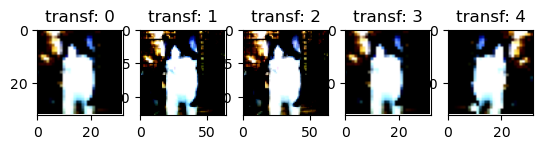

In [83]:
# Explore your dataset in this cell, you do not need to produce any results.
img_size = None
train_dataset = None

# YOUR CODE HERE

class NormalizePerImage:
    def __call__(self, img):
        img = transforms.ToTensor()(img)
        # Compute mean and std for each image across its channels (C, H, W)
        mean = torch.mean(img, dim=(1, 2), keepdim=True)  # Per-channel mean
        std = torch.std(img, dim=(1, 2), keepdim=True)    # Per-channel std

        # Avoid division by zero by setting a minimum std
        std[std == 0] = 1e-6  # Handle case where std might be 0

        # Normalize the image
        img = (img - mean) / std
        return img

img_size = (32,32)
img_size2 = (64,64)
# 32x32 with ImageNet stats normalization
transform0 = transforms.Compose([
    transforms.Resize(img_size),       # Resize to 32x32
    transforms.ToTensor(),             # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize using ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

# 64x64 with ImageNet stats normalization
transform1 = transforms.Compose([
    transforms.Resize(img_size2),      # Resize to 64x64
    transforms.ToTensor(),             # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize using ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

# 64x64 with per-image normalization
transform2 = transforms.Compose([
    transforms.Resize(img_size2),      # Resize to 64x64
    NormalizePerImage() # transforms ToTensor
    ])

# 64x64 without normalization
transform3 = transforms.Compose([
    transforms.Resize(img_size),                        # Resize to 32x32
    transforms.ToTensor(),                              # Convert to tensor (no normalization)
    transforms.Normalize(mean=[0.485, 0.456, 0.406],    # Normalize using ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

transform4 = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize using ImageNet stats
                         std=[0.229, 0.224, 0.225])
])


example32_dataset = DogsCatsData(small_train_path, transform0, dog_label=1, cat_label=0)
example64_dataset = DogsCatsData(small_train_path, transform1, dog_label=1, cat_label=0)
example64_ownnorm_dataset = DogsCatsData(small_train_path, transform2, dog_label=1, cat_label=0)
example32_no_norm_dataset = DogsCatsData(small_train_path, transform3, dog_label=1, cat_label=0)
example32_flip_rot_resize = DogsCatsData(small_train_path, transform4, dog_label=1, cat_label=0)


compare_transforms([example32_dataset, example64_dataset,example64_ownnorm_dataset,example32_no_norm_dataset,example32_flip_rot_resize], 0)



**(0 points)**

Normalisation of the training data is popular in pre-processing. What is the argument or intuition for why this is a beneficial transformation?

**Your answer:** (fill in here)

### 1.3 Data loaders
With our dataset class implementation in place, creating a `DataLoader` instance is simple.

The data loader class wraps the dataset and provides a way to iterate over batches in the training loop.
To produce batches, it gets the total number of samples $N$ with the dataset's `__len__` method.
It divides the indices $1, \dots, N$ into equally sized index batches with $B$ (batch size) elements. A particular batch with pairs of image and label is created by calling the dataset's `__getitem__` method with the indices in the batch. NB: the last batch in an epoch might be smaller if $N$ is not divisible by $B$.

Create the data loaders needed for training (use the small version of the data), in the cell below.
The `DataLoader` class is documented [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) , but it's not that much to it.
You simply create a data loader with a dataset instance and some other (self-explanatory) settings:

```python
train_dataloader = DataLoader(example_dataset, batch_size=batch_size, shuffle=True)
```

**(1 point)**

Create data loaders required for training and validation.

Hints:
- The specified `batch_size` should be chosen so that you train fast but don't run out of memory. You need to figure this out empirically; start small and increase the batch size until you run out of memory. Beyond this pragmatic approach, feel free to contribute to the highly contested scientific debate about the relation between batch size and generalisation.
- The `DataLoader` constructor takes an optional argument `num_workers`, which defaults to `0` if not provided. Setting a higher number creates multiple threads which load batches concurrently. This can speed up training considerably.

In [84]:
batch_size = None
train_dataloader = None
val_dataloader = None

# YOUR CODE HERE

small_train_dataset = DogsCatsData(small_train_path, transform4, dog_label=1, cat_label=0)
small_val_dataset = DogsCatsData(small_val_path, transform3, dog_label=1, cat_label=0)


batch_size = 32
train_dataloader = DataLoader(small_train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(small_val_dataset, batch_size=batch_size, shuffle=False)
#loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [85]:
# Test case for `train_dataloader`
ha1_tests.test_dataloader(train_dataloader)

Test passed


In [86]:
# Test case for `val_dataloader`
ha1_tests.test_dataloader(val_dataloader)

Test passed


**(0 points)**

What batch size did you use and why?

**Your answer:** (fill in here)

---
## 2. Training

### 2.1 The first model

**(3 points)**

Now, it's time to create a model called `FirstCnn`. To begin with, you have to create a CNN to an exact specification. After that, you will get the chance to be more creative.

For the first model, create a network that:
- Inherits from [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)
- Implements a constructor `__init__(self, img_size)`, a `forward(self, input_batch)` method and whatever other helper methods you deem necessary. Note that a (square) image size should be a parameter in the model's constructor. While not strictly necessary, it is an acceptable way of handling varying input dim's and it is convenient for testing.
- Can handle square images of arbitrary size and arbitrary large mini-batch sizes (within memory limits, of course). You may assume that there are always three colour channels, i.e., a mini-batch will have the shape `(batch size = B, num channels = 3, img size = D, D)`
- Has layers:
    1. Two convolutional layers, each with 10 filters, kernel size = 3, stride = 1, padding = 0
    2. A single fully connected layer.
    - *Note:*
        - Related layers such as a pooling operation are optional.
        - Choose suitable activation functions.
        - Take the layers from [`torch.nn`](https://pytorch.org/docs/stable/nn.html) module, and **not** from `torch.nn.functional` module. 
- Outputs the probability of the image belonging to the class 'dog'. Technically the output should consist of `B` probabilities, one for each image in the mini-batch and so have the shape `(B,)`.

Hints:

- The subpage for [`torch.nn`](https://pytorch.org/docs/stable/nn.html) is a good place to find the layer specifics.
- Going from the last CNN layer to the final fully connected layer is not trivial. The convolutions produces feature maps which we can think of as an image with many channels, while the fully connected layer expects a row vector as input. Calculate how many output neurons the convolutions produce and use `.reshape` to make your tensor fit the fully connected layer. It is also common to see the `.view` and `.squeeze` methods to do the same thing. They basically do the same thing (apart from some differences in internal memory management) but are less transparent. *Hint within the hint:* remember that the fully connected layers expects a *batch* of 1D tensors. 


In [87]:
# class FirstCnn...
#    def __init__(self, img_size):
#       ...
#    ...

# first_model = FirstCnn(img_size)

# YOUR CODE HERE



import torch
import torch.nn as nn

class FirstCnn(nn.Module):
    def __init__(self, img_size):
        """
        Initialize the CNN model.
        Args:
            img_size (int): Size of the input image (assumes a square image, so D x D).
        """
        super(FirstCnn, self).__init__()

        # First conv layer: 3 input channels (RGB), 10 output filters, 3x3 kernel, stride 1, padding 0
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
        # Second conv layer: 10 input channels (from conv1), 10 output filters, 3x3 kernel, stride 1, padding 0
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=0)
        
        # Activation function: ReLU
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer with 2x2 kernel

        # Calculate the size after the conv layers to define the fully connected layer
        # Calculate the size after the conv and pooling layers
        # After conv1: (img_size - 2) x (img_size - 2)
        # After pooling: ((img_size - 2) // 2) x ((img_size - 2) // 2)
        # After conv2: ((img_size - 4) - 2) x ((img_size - 4) - 2)
        # After pooling: (((img_size - 4) - 2) // 2) x (((img_size - 4) - 2) // 2)
        conv_output_size = self._calculate_conv_output_size(img_size)  # 10 filters       
         
        # Fully connected layer: conv_output_features -> 1 (for binary classification)
        self.fc = nn.Linear(conv_output_size, 1)

        # Output activation: Sigmoid for binary classification (dog probability)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Forward pass of the model.
        Args:
            x (Tensor): Input batch of images of shape (B, 3, D, D) where B is the batch size.
        Returns:
            Tensor: Probabilities of each image being a dog (shape (B,)).
        """
        # Pass through the first conv layer
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        # Pass through the second conv layer
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        # Flatten the output from conv layers into a vector
        x = torch.flatten(x, start_dim=1)  # Flatten the tensor

        # Pass through the fully connected layer
        x = self.fc(x)

        # Apply sigmoid to get the probability for 'dog' class
        x = self.sigmoid(x)

        return x.view(-1)   # Ensure the output is of shape (B,)
    
    def _calculate_conv_output_size(self, img_size):
        """
        Helper function to calculate the size of the output from conv and pool layers.
        This will be used to define the size of the fully connected layer.
        Args:
            img_size (int): Size of the input image (D x D).
        Returns:
            int: The flattened size after the conv + pool layers.
        """
        # after conv1: (img_size - 2) because kernel_size=3 and padding=0
        size_after_conv1 = img_size - 2
        # after pooling1: divide by 2 due to max pooling
        size_after_pool1 = size_after_conv1 // 2

        # after conv2: (size_after_pool1 - 2)
        size_after_conv2 = size_after_pool1 - 2
        # after pooling2: divide by 2 due to max pooling
        size_after_pool2 = size_after_conv2 // 2

        # final size = number of filters * height * width
        conv_output_size = 10 * size_after_pool2 * size_after_pool2
        return conv_output_size

# Example instantiation for 32x32 images
img_size = 32
model = FirstCnn(img_size)

# Print the model to verify its structure
print(model)




FirstCnn(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=360, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [88]:
# Test case 1 for `FirstCnn`
# Note that the test takes the actual class, not an instance of it, as input.
ha1_tests.test_model(FirstCnn)

Test passed.


In [89]:
# Test case 2 for `FirstCnn`
ha1_tests.test_architecture(FirstCnn)

Test passed


**(0 points)**

You have been told that one of the benefits of CNN is that it can handle input of different sizes. Yet, you needed to know the image size in the constructor.
Explain how you made your model handle different input sizes and why it is necessary, despite it being a CNN.

**Your answer:** (fill in here)

### 2.2 The training loop

**(2 points)**

You have already seen quite a few training loops in the preparations. Below we provide you with an example of a basic one that you can use.
You need to provide an implementation that maps network outputs (probabilites) to hard labels.

An extra point is awarded if you provide a vectorised implementation.

In [22]:
def output_to_label(z):
    """Map network output z to a hard label {0, 1}

    Args:
        z (Tensor): Probabilities for each sample in a batch.
    Returns:
        c (Tensor): Hard label {0, 1} for each sample in a batch
    """
    # YOUR CODE HERE
    
    # convert probabilities to hard labels using a threshold of 0.5
    c = (z >= 0.5).long()  # Change to long() to match the required data type

    return c

In [23]:
# Test case for `output_to_label` function
ha1_tests.test_output_to_label(output_to_label)

Test passed


In [90]:
def training_loop(
    model, optimizer, loss_fn, train_loader, val_loader, num_epochs, print_every
):
    print("Starting training")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    train_losses, train_accs, val_losses, val_accs = [], [], [], []

    for epoch in range(1, num_epochs + 1):
        model, train_loss, train_acc = train_epoch(
            model, optimizer, loss_fn, train_loader, val_loader, device, print_every
        )
        val_loss, val_acc = validate(model, loss_fn, val_loader, device)
        print(
            f"Epoch {epoch}/{num_epochs}: "
            f"Train loss: {sum(train_loss)/len(train_loss):.3f}, "
            f"Train acc.: {sum(train_acc)/len(train_acc):.3f}, "
            f"Val. loss: {val_loss:.3f}, "
            f"Val. acc.: {val_acc:.3f}"
        )
        # chnaged to append the train loss and accuracy of the whole epoch
        train_losses.append(sum(train_loss)/len(train_loss)) 
        train_accs.append(sum(train_acc)/len(train_loss))
        val_losses.append(val_loss)
        val_accs.append(val_acc)
    return model, train_losses, train_accs, val_losses, val_accs


def train_epoch(
    model, optimizer, loss_fn, train_loader, val_loader, device, print_every
):
    # Train:
    model.train()
    train_loss_batches, train_acc_batches = [], []
    num_batches = len(train_loader)
    for batch_index, (x, y) in enumerate(train_loader, 1):
        inputs, labels = x.to(device), y.to(device)
        optimizer.zero_grad()
        z = model.forward(inputs)
        loss = loss_fn(z, labels.float())
        loss.backward()
        optimizer.step()
        train_loss_batches.append(loss.item())

        hard_preds = output_to_label(z)
        acc_batch_avg = (hard_preds == labels).float().mean().item()
        train_acc_batches.append(acc_batch_avg)

        # If you want to print your progress more often than every epoch you can
        # set `print_every` to the number of batches you want between every status update.
        # Note that the print out will trigger a full validation on the full val. set => slows down training
        if print_every is not None and batch_index % print_every == 0:
            val_loss, val_acc = validate(model, loss_fn, val_loader, device)
            model.train()
            print(
                f"\tBatch {batch_index}/{num_batches}: "
                f"\tTrain loss: {sum(train_loss_batches[-print_every:])/print_every:.3f}, "
                f"\tTrain acc.: {sum(train_acc_batches[-print_every:])/print_every:.3f}, "
                f"\tVal. loss: {val_loss:.3f}, "
                f"\tVal. acc.: {val_acc:.3f}"
            )

    return model, train_loss_batches, train_acc_batches


def validate(model, loss_fn, val_loader, device):
    val_loss_cum = 0
    val_acc_cum = 0
    model.eval()
    with torch.no_grad():
        for batch_index, (x, y) in enumerate(val_loader, 1):
            inputs, labels = x.to(device), y.to(device)
            z = model.forward(inputs)

            batch_loss = loss_fn(z, labels.float())
            val_loss_cum += batch_loss.item()
            hard_preds = output_to_label(z)
            acc_batch_avg = (hard_preds == labels).float().mean().item()
            val_acc_cum += acc_batch_avg
    return val_loss_cum / len(val_loader), val_acc_cum / len(val_loader)

**(1 point)**

Use the training loop to train your model, using the two dataloaders you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Hints:
- Which `loss_fn` should you use? Think first about what is suitable for this problem, not what seems to work better empirically.
- Training on a CPU is slow and in the beginning you just want to verify that your architecture actually produces a predicition with the correct shape. Make everything you can to speed up the prototyping phase, e.g. train only for a single epoch and make the images ridiculously small.

In [91]:
loss_fn = None

# YOUR CODE HERE

# Initialize your model
img_size = 32  # or whatever size you want
model = FirstCnn(img_size)

# Choose a loss function and optimizer
loss_fn = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set up dataloaders
batch_size = 32
train_dataloader = DataLoader(small_train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(small_val_dataset, batch_size=batch_size, shuffle=False)

# Training parameters
num_epochs = 20 # Start with a small number of epochs for quick testing
print_every = 30  # Print every 10 batches

# Run the training loop

first_model, first_train_losses, first_train_accs, first_val_losses, first_val_accs = training_loop(
    model, optimizer, loss_fn, train_dataloader, val_dataloader, num_epochs, print_every
)

Starting training
	Batch 30/110: 	Train loss: 0.695, 	Train acc.: 0.514, 	Val. loss: 0.691, 	Val. acc.: 0.533
	Batch 60/110: 	Train loss: 0.691, 	Train acc.: 0.532, 	Val. loss: 0.686, 	Val. acc.: 0.564
	Batch 90/110: 	Train loss: 0.688, 	Train acc.: 0.557, 	Val. loss: 0.683, 	Val. acc.: 0.595
Epoch 1/20: Train loss: 0.690, Train acc.: 0.537, Val. loss: 0.679, Val. acc.: 0.589
	Batch 30/110: 	Train loss: 0.669, 	Train acc.: 0.618, 	Val. loss: 0.666, 	Val. acc.: 0.618
	Batch 60/110: 	Train loss: 0.656, 	Train acc.: 0.632, 	Val. loss: 0.656, 	Val. acc.: 0.617
	Batch 90/110: 	Train loss: 0.646, 	Train acc.: 0.620, 	Val. loss: 0.654, 	Val. acc.: 0.622
Epoch 2/20: Train loss: 0.659, Train acc.: 0.623, Val. loss: 0.640, Val. acc.: 0.648
	Batch 30/110: 	Train loss: 0.634, 	Train acc.: 0.660, 	Val. loss: 0.638, 	Val. acc.: 0.650
	Batch 60/110: 	Train loss: 0.633, 	Train acc.: 0.643, 	Val. loss: 0.621, 	Val. acc.: 0.651
	Batch 90/110: 	Train loss: 0.623, 	Train acc.: 0.652, 	Val. loss: 0.615, 	V

**(0 points)**

Which loss function did you use and why? In our "Cats vs Dogs" problem, the dataset is balanced in terms of classes. What would you change if there was a class imbalance (for example, if we had much less dog images)?

**Your answer:** (fill in here)

### 2.3 Visualisation

**(1 point)**

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.
Note that the given training loop produces metrics at different intervals for training and validation, make sure that you align your metrics in a way that makes sense.

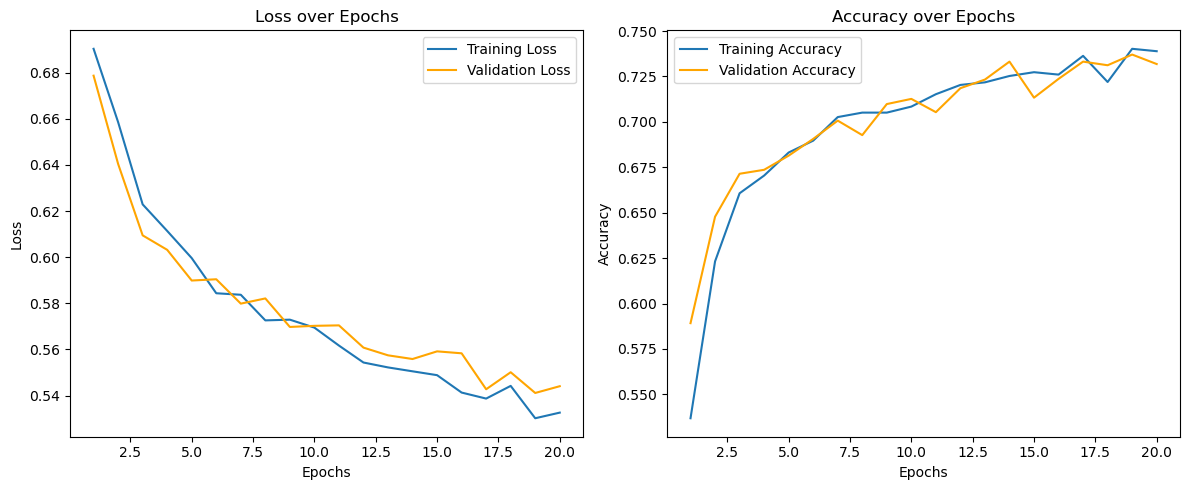

In [92]:
# YOUR CODE HERE

def plot_metrics(train_losses, val_losses, train_accs, val_accs,num_epochs):
    # num_epochs is the total number of epochs for training
    epochs = range(1, num_epochs + 1)
    #epochs = range(1, len(train_losses) + 1)

    # Align training losses and accuracies to the number of validation epochs
    #train_losses_aligned = train_losses[:len(val_losses)]
    #train_accs_aligned = train_accs[:len(val_accs)]

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accs, label='Training Accuracy')
    plt.plot(epochs, val_accs, label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()
#plot_metrics(train_losses, val_losses, train_accs, val_accs,num_epochs)
plot_metrics(first_train_losses, first_val_losses, first_train_accs, first_val_accs, num_epochs)

**(2 points)**

Based on these, what would you suggest for improving your model? Why?

**Your answer:** (fill in here)

[Save your model](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to disk (the architecture, weights, optimizer state, losses and accuracies). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual file you create is not relevant to your submission. The code to save the model is given in the cell below.

In [94]:

# Assuming that you named your model "first_model" and training statistics as following
torch.save(
    {
        "model_state_dict": first_model.state_dict(),
        "train_losses": first_train_losses,
        "train_accs": first_train_accs,
        "val_losses": first_val_losses,
        "val_accs": first_val_accs,
    },
    "./first_model.ckpt",
)

# Example of creating and initialising model with a previously saved state dict:
saved_first_model = FirstCnn(img_size)  # fill-in the arguments if needed
checkpoint = torch.load("first_model.ckpt")
saved_first_model.load_state_dict(checkpoint["model_state_dict"])

# Example of re-using saved statistics:
print("Validation accuracies:", checkpoint["val_accs"])


Validation accuracies: [0.5891907291209444, 0.647796353127094, 0.671447568751396, 0.6736322184826465, 0.6814209730067151, 0.6906344979367358, 0.7007028879003322, 0.6927241644960769, 0.7098214283902594, 0.7126709730067151, 0.7053571432194812, 0.7185600298516294, 0.7233092708790556, 0.7331876894260975, 0.7133358666237365, 0.7236892099076129, 0.7331876894260975, 0.7311930085750337, 0.7370820666881318, 0.7318579021920549]


---
## 3. Improving your model

**(3 points)**

Now you are free to create whichever model you want. A simple improvement based on your analysis of the above results is fine, or you can do something more ambitious. When you're happy with one architecture, copy it in the cell below and train it here. Save the training and validation losses and accuracies. You'll use this later to compare your best model with the one using transfer learning. *Hint*: reducing the input image size facilitates training.

**NOTE**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to Canvas, the cell below must contain only the definition and training of **one model**. Remove all code related to the models that were not chosen.

**NOTE 2**: It may feel like you are stuck trying to make the model perform better. Understanding the mechanics and a lot of experimentation will help gain intuition. But it is also beneficial for you to explore some of the popular architectures, building blocks, and techniques (e.g., residual blocks, Inception modules, dilated convolutions, depthwise separable convolutions, data augmentation etc). You will need to explore/study a lot during the project work, so we highly encourage you to already **start looking for and analyzing existing approaches** and learn how to use them for your tasks.

In [95]:
# class ImprovedCnn...
#    def __init__...
#       ...
#    ...

# impr_model = ImprovedCnn(...
    
# YOUR CODE HERE

# model hyperparameters for each layer
out_channels_mat = [32,64,128]
kernel_sizes = [3,3,3]
strides = [1,1,1]
paddings = [0,0,0]

class SimpleCnn(nn.Module):
    def __init__(self, img_size,out_channels_mat,kernel_sizes, strides, paddings,dropout_percentage = 0.2):
        """
        Initialize the CNN model.
        Args:
            img_size (int): Size of the input image (assumes a square image, so D x D).
        """
        super(SimpleCnn, self).__init__()

        self.out_channels_mat = out_channels_mat
        self.kernel_sizes = kernel_sizes
        self.strides = strides
        self.paddings = paddings
        

        
        # First conv layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=out_channels_mat[0], kernel_size=kernel_sizes[0],
                               stride=strides[0], padding=paddings[0])
        # Second conv layer
        self.conv2 = nn.Conv2d(in_channels=out_channels_mat[0], out_channels=out_channels_mat[1], kernel_size=kernel_sizes[1],
                               stride=strides[1], padding=paddings[1])
        # Third conv layer
        self.conv3 = nn.Conv2d(in_channels=out_channels_mat[1], out_channels=out_channels_mat[2], kernel_size=kernel_sizes[2],
                               stride=strides[2], padding=paddings[2])
        # Forth conv layer
        #self.conv4 = nn.Conv2d(in_channels=out_channels_mat[2], out_channels=out_channels_mat[3], kernel_size=kernel_sizes[3],
        #                       stride=strides[3], padding=paddings[3])
        
        # Activation function: ReLU
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer with 2x2 kernel
        self.dropout = nn.Dropout(p=dropout_percentage) # dropout layer
        
         # calculate output size recursively starting from the first layer 
        conv_output_size = self._calculate_conv_output_size(img_size, 0) 
         
        # Fully connected layer: conv_output_features -> 1 (for binary classification)
        self.fc = nn.Linear(conv_output_size, 1)

        # sigmoid for binary classification in the output (dog probability)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Forward pass of the model.
        Args:
            x (Tensor): Input batch of images of shape (B, 3, D, D) where B is the batch size.
        Returns:
            Tensor: Probabilities of each image being a dog (shape (B,)).
        """
        # Pass through the first conv layer
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)
        
        # Pass through the second conv layer
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)
        
        # Pass through the third conv layer
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.dropout(x)
        
        # Pass through the forth conv layer
        #x = self.conv4(x)
        #x = self.relu(x)
        #x = self.pool(x)
        #x = self.dropout(x)
        
        # Flatten the output from conv layers into a vector
        x = torch.flatten(x, start_dim=1)  # Flatten the tensor

        # Pass through the fully connected layer
        x = self.fc(x)

        # Apply sigmoid to get the probability for 'dog' class
        x = self.sigmoid(x)

        return x.view(-1)   # Ensure the output is of shape (B,)
    
    def _calculate_intermidiate_sizes(self, input_size, kernel_size, stride, padding, pool_size=2):
        # calculate each size based on the input size kernel size stride padding and pool size of each layer
        size_after_conv = (input_size - kernel_size + 2 * padding) // stride + 1
        size_after_pool = size_after_conv // pool_size
        return size_after_pool

    def _calculate_conv_output_size(self, img_size, layer_index):
        """
        Recursive function to calculate the output size after each layer.
        Args:
            img_size (int): Size of the input image (D x D).
            layer_index (int): Current layer index.
        Returns:
            int: The final flattened output size for the fully connected layer.
        """
        # if calculations were applied to all layers, return the size
        if layer_index == len(self.out_channels_mat):
            return img_size * img_size * self.out_channels_mat[-1]
        
        # Apply the conv and pooling calculations to the size of the current layer
        new_size = self._calculate_intermidiate_sizes(
            img_size,
            self.kernel_sizes[layer_index],
            self.strides[layer_index],
            self.paddings[layer_index]
            )

        # Recursively calculate the size for the next layer
        return self._calculate_conv_output_size(new_size, layer_index + 1)



# initialize model
img_size = 32
dropout_per = 0.2
model = SimpleCnn(img_size,out_channels_mat,kernel_sizes, strides, paddings, dropout_per)

# print the model structure
print(model)

# loss function and optimizer
loss_fn = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001,  weight_decay=1e-4) # L2 weight regularization


# dataloaders
batch_size = 32
train_dataloader = DataLoader(small_train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(small_val_dataset, batch_size=batch_size, shuffle=False)

# epochs and print parameters
num_epochs = 20 # small number of epochs for quick testing
print_every = 30  

# train model
simple_model, simple_train_losses, simple_train_accs, simple_val_losses, simple_val_accs = training_loop(
    model, optimizer, loss_fn, train_dataloader, val_dataloader, num_epochs, print_every
)


SimpleCnn(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Starting training
	Batch 30/110: 	Train loss: 0.700, 	Train acc.: 0.500, 	Val. loss: 0.689, 	Val. acc.: 0.568
	Batch 60/110: 	Train loss: 0.678, 	Train acc.: 0.582, 	Val. loss: 0.687, 	Val. acc.: 0.548
	Batch 90/110: 	Train loss: 0.671, 	Train acc.: 0.585, 	Val. loss: 0.661, 	Val. acc.: 0.608
Epoch 1/20: Train loss: 0.680, Train acc.: 0.565, Val. loss: 0.665, Val. acc.: 0.572
	Batch 30/110: 	Train loss: 0.661, 	Train acc.: 0.594, 	Val. loss: 0.642, 	Val. acc.: 0.644
	Batch 60/110: 	Train loss: 0.642, 	Train acc.: 0.632, 	Val. loss: 0.641, 	Val. acc.: 0.612
	Batch 90/110:

**(1 point)**

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

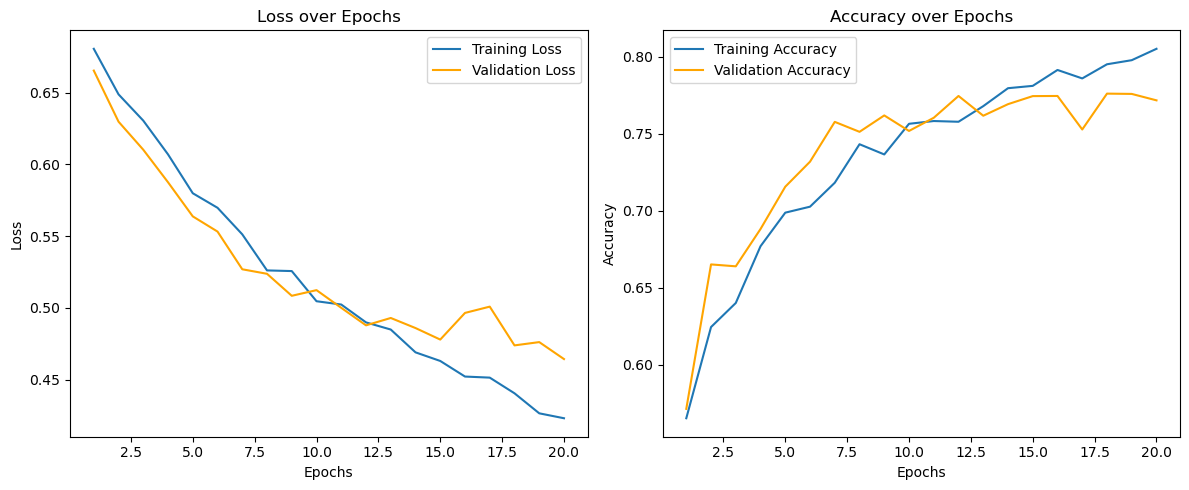

In [96]:
# YOUR CODE HERE

plot_metrics(simple_train_losses, simple_val_losses, simple_train_accs, simple_val_accs, num_epochs)

**(1 point)**

How does the model perform, compared to the first CNN model? Create one plot with the training accuracy and another with the validation accuracy of the two models.

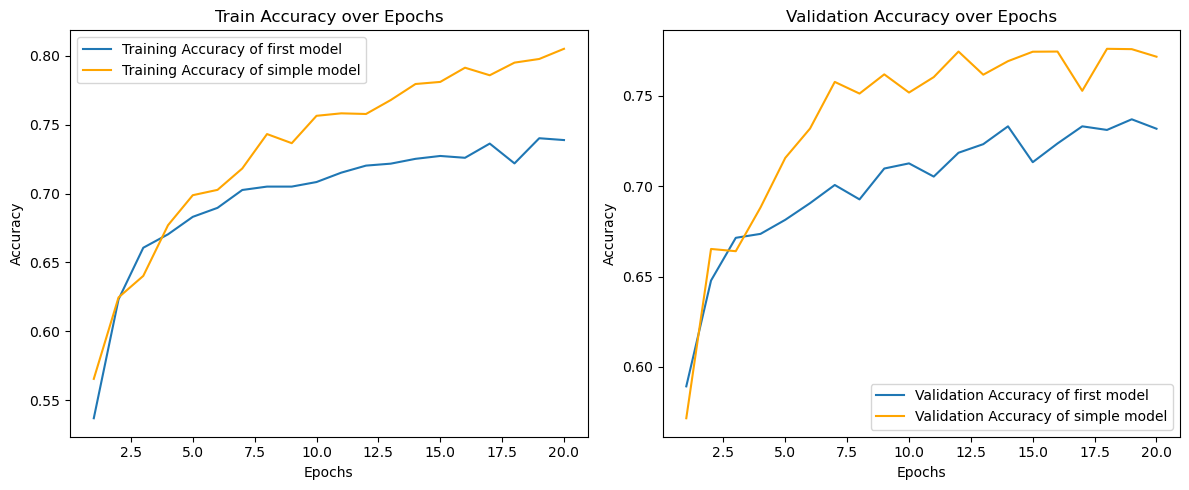

In [97]:
# YOUR CODE HERE
def compare_metrics(train_acc1, val_acc1, train_acc2, val_acc2,num_epochs):
    # num_epochs is the total number of epochs for training
    epochs = range(1, num_epochs + 1)
    #epochs = range(1, len(train_losses) + 1)

    # Align training losses and accuracies to the number of validation epochs
    #train_losses_aligned = train_losses[:len(val_losses)]
    #train_accs_aligned = train_accs[:len(val_accs)]

    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc1, label='Training Accuracy of first model')
    plt.plot(epochs, train_acc2, label='Training Accuracy of simple model', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train Accuracy over Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_acc1, label='Validation Accuracy of first model')
    plt.plot(epochs, val_acc2, label='Validation Accuracy of simple model', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()
#plot_metrics(train_losses, val_losses, train_accs, val_accs,num_epochs)
compare_metrics(first_train_accs, first_val_accs, simple_train_accs, simple_val_accs, num_epochs)

**(1 point)**

Did your results improve? What problems did your improvements fix? Explain why, or why not. 

**Your answer:** (fill in here)

Save your model to disk.

In [98]:
# Assuming that you named your model and statistics as "impr_..."
torch.save(
    {
        "model_state_dict": simple_model.state_dict(),
        "train_losses": simple_train_losses,
        "train_accs": simple_train_accs,
        "val_losses": simple_val_losses,
        "val_accs": simple_val_accs,
    },
    "./simple_model.ckpt",
)

# YOUR CODE HERE

# Example of creating and initialising model with a previously saved state dict:
saved_simple_model = SimpleCnn(img_size,out_channels_mat,kernel_sizes, strides, paddings, dropout_per) # fill-in the arguments if needed
checkpoint2 = torch.load("simple_model.ckpt")
saved_simple_model.load_state_dict(checkpoint2["model_state_dict"])

# Example of re-using saved statistics:
print("Validation accuracies:", checkpoint2["val_accs"])


Validation accuracies: [0.571523556049834, 0.665273556049834, 0.6640387532558847, 0.6882598780571146, 0.7157104865033576, 0.7319528879003322, 0.7577887532558847, 0.7513297872340425, 0.761968085106383, 0.7518996964109704, 0.7604483277239698, 0.7746010638297872, 0.7617781149580124, 0.769281914893617, 0.7745060793896938, 0.7746010638297872, 0.7528495446164557, 0.7761208212122004, 0.7759308510638298, 0.7717515192133315]


In [54]:
checkpoint2 = torch.load("simple_model.ckpt")
print("Validation accuracies:", checkpoint2["val_accs"])


Validation accuracies: [0.5049392097490899, 0.6048632213409911, 0.5061740122259931, 0.6440919447452464, 0.6563449844400934, 0.6636588142273274, 0.6890197573824132, 0.6859802426175868, 0.6646086624328126, 0.7138107900923871, 0.7316679333118682, 0.738031914893617, 0.7427811546528593, 0.667933130517919, 0.7393617021276596, 0.7091565347732381, 0.7488601829143281, 0.7337575986030254, 0.7338525830431187, 0.7480053191489362, 0.7622530396948469, 0.7594984807866685, 0.7645326751343747, 0.785334346142221, 0.7728913375671874, 0.7715615503331448, 0.7625379942833109, 0.7517097262625999, 0.7708016722760302, 0.7699468085106383]


---
## 4. Transfer Learning

**From now, training on a CPU will likely not be feasible. If your computer has a GPU, try it out! Otherwise, now is the time to connect to your cloud instance**

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected layers + softmax). We'll substitute them with our own top network, designed for dog/cat classification.
This top network is often called the "head" in transfer learning.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the *pretrained* VGG16 model, from the [torchvision.models](https://pytorch.org/vision/stable/models.html?highlight=vgg#torchvision.models.vgg16).

In [44]:
from torchvision import models

vgg_model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# If you had to downgrade Python+torch+torchvision
# (i.e. your operating system does not support the provided environment file):
# the syntax for loading vgg16 weights is different in older version:
#     vgg_model = models.vgg16(pretrained=True)

print(vgg_model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


**(1 point)**

Create a new model named `head` as a so-called head network to the base VGG model.
VGG is a relatively deep network so think about what would be a reasonable model head for transfer learning.

*Hint:*
- You can access and modify the top layers of the VGG model with `vgg_model.classifier`, and the remaining layers with `vgg_model.features`.
- You can get the number of output features of `vgg_model.features` with `vgg_model.classifier[0].in_features`

In [102]:
#head = None

# YOUR CODE HERE
vgg_model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

in_features = vgg_model.classifier[0].in_features

# Define a new model head
class Head(nn.Module):
    def __init__(self, in_features, num_classes):
        super(Head, self).__init__()
        
        # Create a new classifier with a few fully connected layers
        self.head = nn.Sequential(
            nn.Linear(in_features, 512),  # First FC layer
            nn.ReLU(),                    # Activation
            nn.Dropout(0.5),              # Dropout for regularization
            nn.Linear(512, 256),          # Second FC layer
            nn.ReLU(),                    # Activation
            nn.Dropout(0.5),              # Dropout
            nn.Linear(256, num_classes)   # Final output layer (num_classes)
        )
        self.final_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.head(x)
        x = self.final_activation(x)
        return x.view(-1)

# Number of classes for your specific task (e.g., binary classification would use num_classes=2)
num_classes = 1

# Create an instance of the  head with the appropriate input size and number of classes
head = Head(in_features=in_features, num_classes=num_classes)



In [103]:
# Test case for `head`
ha1_tests.test_transfer_learning_head(head)

Test passed


**(2 points)**

Now add the new model on top of VGG. You full model should be stored in the `vgg_model` variable.

In [104]:
# YOUR CODE HERE
vgg_model.classifier = head

# Now, the `vgg_model` has the custom head for your specific task
print(vgg_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [105]:
# Test case 1 for `vgg_model`
ha1_tests.test_vgg_model_1(vgg_model, head)

Test passed


In [106]:
# Test case 2 for `vgg_model`
ha1_tests.test_vgg_model_2(vgg_model, head)

Test passed


### 4.1 Using VGG features

**(1 point)**

Now we're almost ready to train the new model. For transfer learning we want to freeze all but the top layers in your architecture (i.e. signal to the optimizer that the bottom layers should not be changed during optimization). We do that by setting the attribute `requires_grad` of every parameter in the feature sub-network of `vgg_model` to `False`.

In [107]:
# YOUR CODE HERE

for param in vgg_model.features.parameters():
    param.requires_grad = False

In [108]:
# Test case for `vgg_model`
ha1_tests.test_vgg_model_parameters_for_transfer_learning(vgg_model)

Test passed


**(1 point)**

Prepare dataloaders for transfer learning. Don't forget that the VGG network is specialised for images of a certain size.

In [109]:
train_dataloader = None
val_dataloader = None
# YOUR CODE HERE


# VGG16 expects images to be resized to 224x224 and normalized with ImageNet's mean/std.
image_size = (224,224)  # VGG16 input size

# ImageNet normalization constants
mean = [0.485, 0.456, 0.406]  # mean of ImageNet dataset for RGB channels
std = [0.229, 0.224, 0.225]   # std of ImageNet dataset for RGB channels


transform_val = transforms.Compose([
    transforms.Resize(image_size),      # Resize to 224x224
    transforms.ToTensor(),            # Convert to tensor (no normalization)
    transforms.Normalize(mean, std)   # Normalize

])

# use random augmentations for training
transform_train = transforms.Compose([
    transforms.Resize(image_size),        # Resize the image to 224x224
    transforms.RandomHorizontalFlip(),  # Random horizontal flip for augmentation
    transforms.RandomRotation(10),      # Random rotation
    transforms.ToTensor(),              # Convert to tensor (no normalization)
    transforms.Normalize(mean, std)
])

small_train_dataset = DogsCatsData(small_train_path, transform_train, dog_label=1, cat_label=0)
small_val_dataset = DogsCatsData(small_val_path, transform_val, dog_label=1, cat_label=0)


# Create the dataloaders
batch_size = 32 
train_dataloader = DataLoader(small_train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(small_val_dataset, batch_size=batch_size, shuffle=False)


In [110]:
# Test case for `train_dataloader`
ha1_tests.test_dataloader_for_transfer_learning(train_dataloader)

Test passed


In [111]:
# Test case for `val_dataloader`
ha1_tests.test_dataloader_for_transfer_learning(val_dataloader)

Test passed


**(1 point)**

Perform the transfer learning by training the top layers of your model.

In [112]:
optimizer = None
num_epochs = None

# YOUR CODE HERE

# loss function and optimizer
loss_fn = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(vgg_model.parameters(), lr=0.001,  weight_decay=1e-4) # L2 weight regularization
num_epochs = 2
print_every =20


transfer_model, transfer_train_losses, transfer_train_accs, transfer_val_losses, transfer_val_accs = training_loop(
    vgg_model, optimizer, loss_fn, train_dataloader, val_dataloader, num_epochs, print_every
)

Starting training
	Batch 20/110: 	Train loss: 0.694, 	Train acc.: 0.509, 	Val. loss: 0.693, 	Val. acc.: 0.538
	Batch 40/110: 	Train loss: 0.696, 	Train acc.: 0.517, 	Val. loss: 0.693, 	Val. acc.: 0.538
	Batch 60/110: 	Train loss: 0.692, 	Train acc.: 0.506, 	Val. loss: 0.693, 	Val. acc.: 0.538
	Batch 80/110: 	Train loss: 0.693, 	Train acc.: 0.541, 	Val. loss: 0.693, 	Val. acc.: 0.538
	Batch 100/110: 	Train loss: 0.692, 	Train acc.: 0.520, 	Val. loss: 0.693, 	Val. acc.: 0.538
Epoch 1/2: Train loss: 0.693, Train acc.: 0.517, Val. loss: 0.693, Val. acc.: 0.538
	Batch 20/110: 	Train loss: 0.691, 	Train acc.: 0.533, 	Val. loss: 0.693, 	Val. acc.: 0.538
	Batch 40/110: 	Train loss: 0.697, 	Train acc.: 0.506, 	Val. loss: 0.693, 	Val. acc.: 0.538
	Batch 60/110: 	Train loss: 0.696, 	Train acc.: 0.523, 	Val. loss: 0.693, 	Val. acc.: 0.538
	Batch 80/110: 	Train loss: 0.693, 	Train acc.: 0.522, 	Val. loss: 0.693, 	Val. acc.: 0.538
	Batch 100/110: 	Train loss: 0.693, 	Train acc.: 0.534, 	Val. loss: 0

**(1 point)**

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

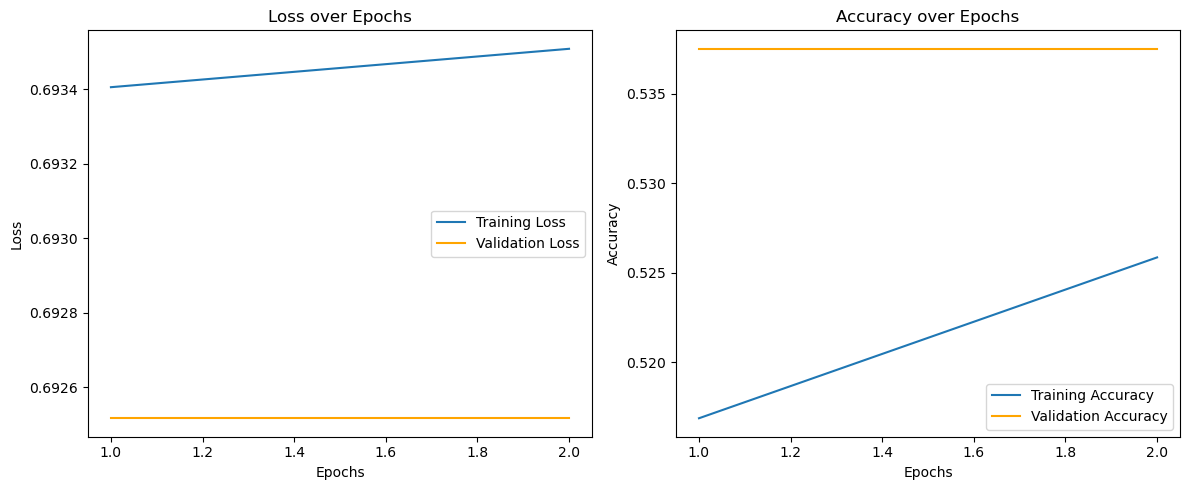

In [113]:
# YOUR CODE HERE
plot_metrics(transfer_train_losses, transfer_val_losses, transfer_train_accs, transfer_val_accs, num_epochs)

**(1 point)**

How does the model perform, compared to the model obtained in step 3? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE
compare_metrics(simple_train_accs, simple_val_accs,transfer_train_accs, transfer_val_accs,num_epochs)

**(1 point)**

Compare these results.

- Which approach worked best, starting from scratch or doing transfer learning?
- Reflect on whether your comparison is fair or not.

**Your answer:** (fill in here)

**(0 points)**

What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** (fill in here)

**(0 points)**

Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** (fill in here)

**(0 points)**

In which scenario would transfer learning be unsuitable?

**Your answer:** (fill in here)

Save the model to a file.

In [ ]:
# YOUR CODE HERE

# Assuming that you named your model and statistics as "impr_..."
torch.save(
    {
        "model_state_dict": transfer_model.state_dict(),
        "train_losses": transfer_train_losses,
        "train_accs": transfer_train_accs,
        "val_losses": transfer_val_losses,
        "val_accs": transfer_val_accs,
    },
    "./transfer_model.ckpt",
)

# YOUR CODE HERE

# Example of creating and initialising model with a previously saved state dict:
saved_transfer_model = Head(in_features=in_features, num_classes=num_classes) # fill-in the arguments if needed
checkpoint3 = torch.load("transfer_model.ckpt")
saved_transfer_model.load_state_dict(checkpoint3["model_state_dict"])

# Example of re-using saved statistics:
print("Validation accuracies:", checkpoint3["val_accs"])


### 4.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers of `vgg_model` by resetting the `requires_grad` attribute to `True`.

In [ ]:
# YOUR CODE HERE
for param in vgg_model.features.parameters():
    param.requires_grad = True

In [ ]:
# Test case for `vgg_model`
ha1_tests.test_vgg_model_parameters_for_fine_tuning(vgg_model)

**(1 point)**

Fine tune the model by training all the layers.

In [ ]:
learning_rate = None
optimizer = None
num_epochs = None

# YOUR CODE HERE
learning_rate = 1e-5
optimizer = optim.Adam(vgg_model.parameters(), lr=learning_rate, weight_decay=1e-4)  # Smaller learning rate for fine-tuning


num_epochs = 1
print_every = 20

# Training the model
transfer_all_model, transfer_all_train_losses, transfer_all_train_accs, transfer_all_val_losses, transfer_all_val_accs = training_loop(
    vgg_model, optimizer, loss_fn, train_dataloader, val_dataloader, num_epochs, print_every
)

In [ ]:
# Test case for `learning_rate`
ha1_tests.test_learning_rate(learning_rate)

**(1 point)**

How does the model perform, compared to the model trained with frozen layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE
compare_metrics(transfer_all_train_accs, transfer_all_val_accs,transfer_train_accs, transfer_val_accs,num_epochs)

**(0 points)**

Why is it a good idea to use a very small learning rate when doing fine tuning?

**Your answer:** (fill in here)

Save the model to file.

In [ ]:
# YOUR CODE HERE

torch.save(
    {
        "model_state_dict": transfer_all_model.state_dict(),
        "train_losses": transfer_all_train_losses,
        "train_accs": transfer_all_train_accs,
        "val_losses": transfer_all_val_losses,
        "val_accs": transfer_all_val_accs,
    },
    "./transfer_all_model.ckpt",
)

# YOUR CODE HERE

# Example of creating and initialising model with a previously saved state dict:
saved_transfer_all_model = Head(in_features=in_features, num_classes=num_classes) # fill-in the arguments if needed
checkpoint4 = torch.load("transfer_all_model.ckpt")
saved_transfer_all_model.load_state_dict(checkpoint4["model_state_dict"])

# Example of re-using saved statistics:
print("Validation accuracies:", checkpoint4["val_accs"])


### 4.3 Improving the top model (optional)

    Improve the architecture for the layers you add on top of VGG16. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here.

In [ ]:
# YOUR CODE HERE

# Define a new model head with improvements
class ImprovedHead(nn.Module):
    def __init__(self, in_features, num_classes):
        super(ImprovedHead, self).__init__()
        
        self.head = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.BatchNorm1d(512),  # Batch Normalization
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),  # Batch Normalization
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, 128),  # Additional layer
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)  # Final output layer
        )

    def forward(self, x):
        return self.head(x)

# Instantiate the improved head
num_classes = 1
improved_head = ImprovedHead(in_features=vgg_model.classifier[0].in_features, num_classes=num_classes)

# Combine VGG16 with the new head
class CombinedModel(nn.Module):
    def __init__(self, vgg_model, head):
        super(CombinedModel, self).__init__()
        self.features = vgg_model.features  # Use VGG16's features
        self.classifier = head  # Use the new head

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)  # Flatten for the head
        x = self.classifier(x)
        return x

# Create an instance of the combined model
model = CombinedModel(vgg_model, improved_head)

# Unfreeze all layers for fine-tuning
for param in model.parameters():
    param.requires_grad = True

# Define loss function and optimizer
loss_fn = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)  # Smaller learning rate for fine-tuning

# Train the model
num_epochs = 1
print_every = 20

# Assuming train_dataloader and val_dataloader are defined
transfer_impr_model, transfer_impr_train_losses, transfer_impr_train_accs, transfer_impr_val_losses, transfer_impr_val_accs = training_loop(
    model, optimizer, loss_fn, train_dataloader, val_dataloader, num_epochs, print_every
)

**(1 point)**

How does the model perform, compared to the model trained in step 4.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios. A point is awarded if your improvement helped.

In [ ]:
# YOUR CODE HERE
compare_metrics(transfer_all_train_accs, transfer_all_val_accs,transfer_impr_train_accs, transfer_impr_val_accs,num_epochs)

Save the model to a file.

In [ ]:
# YOUR CODE HERE

torch.save(
    {
        "model_state_dict": transfer_impr_model.state_dict(),
        "train_losses": transfer_impr_train_losses,
        "train_accs": transfer_impr_train_accs,
        "val_losses": transfer_impr_val_losses,
        "val_accs": transfer_impr_val_accs,
    },
    "./transfer_impr_model.ckpt",
)

# YOUR CODE HERE

# Example of creating and initialising model with a previously saved state dict:
saved_transfer_impr_model = Head(in_features=in_features, num_classes=num_classes) # fill-in the arguments if needed
checkpoint5 = torch.load("transfer_impr_model.ckpt")
saved_transfer_impr_model.load_state_dict(checkpoint5["model_state_dict"])

# Example of re-using saved statistics:
print("Validation accuracies:", checkpoint5["val_accs"])


## 5. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data loaders, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [ ]:
full_train_dataloader = None
full_val_dataloader = None

# YOUR CODE HERE

In [ ]:
# Test case for `full_train_dataloader` and `full_val_dataloader`
ha1_tests.test_dataloaders_for_final_training(full_train_dataloader, full_val_dataloader)

**(1 point)**

Train your model using the full data. This optimization might take a long time.

In [ ]:
learning_rate = None
optimizer = None
num_epochs = None

# YOUR CODE HERE

**(1 point)**

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

**(2 points)**

- What can you conclude from these plots?
- Did you expect what you observe in the plots, explain!

**Your answer:** (fill in here)

Save the model to a file.

In [ ]:
# YOUR CODE HERE

## 6. Evaluation on test set (optional)

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labelled, so we can't compute any supervised performance metrics ourselves. 

As a bit of fun and to inspire some friendly competition you may instead submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

For the test data we need a slightly different dataset class, due to the lack of labels in the data.
A more proper way to implement it would be to make a common class which handles both the train and test settings.
Here, we'll just copy the train dataset class and make some modifications to ignore the labels.

Hints:
- There is a `sampleSubmission.csv` file included in the zip data. Take a look at it to better understand what is the expected format here.
- If you don't know how to create and write to files with Python, it's a well-behaved Google search.

In [ ]:
from pathlib import Path
from time import time


class TestData(Dataset):
    def __init__(self, root: Path, transform):
        root = Path(root)
        if not (root.exists() and root.is_dir()):
            raise ValueError(f"Data root '{root}' is invalid")

        self.root = root
        self.transform = transform
        self._samples = self._collect_samples()

    def __getitem__(self, index):
        path = self._samples[index]
        num_id = int(path.stem)
        img = Image.open(path)
        if self.transform is not None:
            img = self.transform(img)
        return img, num_id

    def __len__(self):
        return len(self._samples)

    def _collect_samples(self):
        test_paths = self._collect_imgs_sub_dir(self.root)
        return sorted(list(test_paths), key=lambda path: int(path.stem))

    @staticmethod
    def _collect_imgs_sub_dir(sub_dir: Path):
        if not sub_dir.exists():
            raise ValueError(f"Data root '{sub_dir}' does not exist.")
        return sub_dir.glob("*.jpg")

    def get_sample_by_id(self, id_):
        id_index = self._samples.index(id_)
        return self[id_index]


# YOUR CODE HERE

Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, but you can submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) via the "Late submission" button (they use the same data). The Kaggle CLI can be used as well. Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** (fill in here)

What was the username you used for this submission?

**Your answer:** (fill in here)